In [99]:
%load_ext autoreload
%autoreload 2
from GDS import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
GeneExon = pd.read_csv("../dat/GTEx_gencode_exons.coding.csv", index_col="exon_id")
GeneExon.head(2)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,chr,start_pos,end_pos,strand,gene
exon_id,,,,,
ENSG00000186092.4_1,1,69091,70008,+,OR4F5
ENSG00000237683.5_1,1,137966,139379,-,AL627309.1


In [43]:
Genes = list(set(GeneExon["gene"].values))
Genes[:10]
print(len(Genes))

18071


In [44]:
lgd = pd.read_csv("../dat/gnomad.mut.1e-3.lgd.bed.gz", delimiter="\t")
lgd.head(2)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,#Chr,Start,End,VAR,Gene,AC,Cons
0,1,69456,69462,69456-C-CCTACA,OR4F5,2,frameshift_variant
1,1,69469,69470,69469-ACAATT-A,OR4F5,2,frameshift_variant


In [80]:
Dat = {}
for i in range(len(Genes)):
    gene = Genes[i]
    tmp_lgd = lgd[lgd["Gene"]==gene]
    tmp_exon = GeneExon[GeneExon["gene"]==gene]
    Gene_obj = GeneExonVar(gene, tmp_exon)
    Gene_obj.addVars(tmp_lgd)
    #print(i)
    #Gene_obj.ShowExons()
    Dat[gene] = Gene_obj

In [134]:
step = 0.05
l = np.arange(0, 1, step) + step
density_mat = []
for i, (k, v) in enumerate(Dat.items()):
    pos, den = v.Percentile()
    res = Percentile(pos, den, l)
    density_mat.append(res)
    #if i >= 10:
    #    break
density_mat = np.array(density_mat)

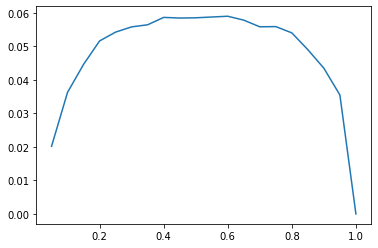

In [135]:
avg_den = np.mean(density_mat, axis=0)
plt.plot(l, avg_den)

### 1.2 Stratified by constraint genes

In [154]:
gnomad_cons = pd.read_csv("~/Work/ASD_Circuits/dat/genes/gnomad.v2.1.1.lof_metrics.by_gene.txt",
                          delimiter="\t", index_col="gene")
cons_genes = set(gnomad_cons[gnomad_cons["pLI"]>0.5].index.values)
uncons_genes = set(gnomad_cons[gnomad_cons["pLI"]<0.5].index.values)

In [155]:
density_mat_cons = []
density_mat_uncons = []
for i, (k, v) in enumerate(Dat.items()):
    pos, den = v.Percentile()
    res = Percentile(pos, den, l)
    if k in cons_genes:
        density_mat_cons.append(res)
    else:
        density_mat_uncons.append(res)
density_mat_cons = np.array(density_mat_cons)
density_mat_uncons = np.array(density_mat_uncons)

(4047, 20)


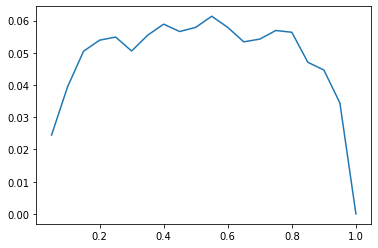

In [156]:
print(density_mat_cons.shape)
avg_den = np.mean(density_mat_cons, axis=0)
plt.plot(l, avg_den)

(14024, 20)


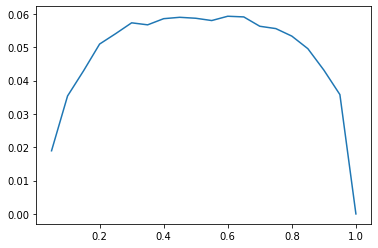

In [157]:
print(density_mat_uncons.shape)
avg_den = np.mean(density_mat_uncons, axis=0)
plt.plot(l, avg_den)